In [ ]:
!pip install statsmodels --upgrade

Please upload AAPL Excel file


Saving HistoricalPrices-4.xlsx to HistoricalPrices-4 (5).xlsx
Please upload MSFT Excel file


Saving HistoricalPrices-3.xlsx to HistoricalPrices-3 (5).xlsx

Columns in AAPL DataFrame: ['Date', ' Open', ' High', ' Low', ' Close', ' Volume']
Columns in MSFT DataFrame: ['Date', ' Open', ' High', ' Low', ' Close', ' Volume']

Unit Root Tests for AAPL:
ADF Test:
ADF Statistic: -1.0119
p-value: 0.7489
Critical Values: {'1%': -3.4353174541055567, '5%': -2.863733732389869, '10%': -2.5679379527245407}

KPSS Test:
KPSS Statistic: 5.0423
p-value: 0.0100
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}

Unit Root Tests for MSFT:
ADF Test:
ADF Statistic: -0.7045
p-value: 0.8456
Critical Values: {'1%': -3.4353516488758684, '5%': -2.8637488209107196, '10%': -2.5679459879960373}

KPSS Test:
KPSS Statistic: 4.9191
p-value: 0.0100
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


<ipython-input-5-ec017b977b81>:47: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series)
<ipython-input-5-ec017b977b81>:47: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._


Best ARMA model for AAPL:
Order: (0, 0)
AIC: 6400.01


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot


Best ARMA model for MSFT:
Order: (0, 1)
AIC: 7971.27


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)



Johansen Cointegration Test:
Trace statistic: [14.05123397  1.26121423]
Critical values (90%, 95%, 99%): [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
r = 0: No cointegration at 95% confidence level
r = 1: No cointegration at 95% confidence level


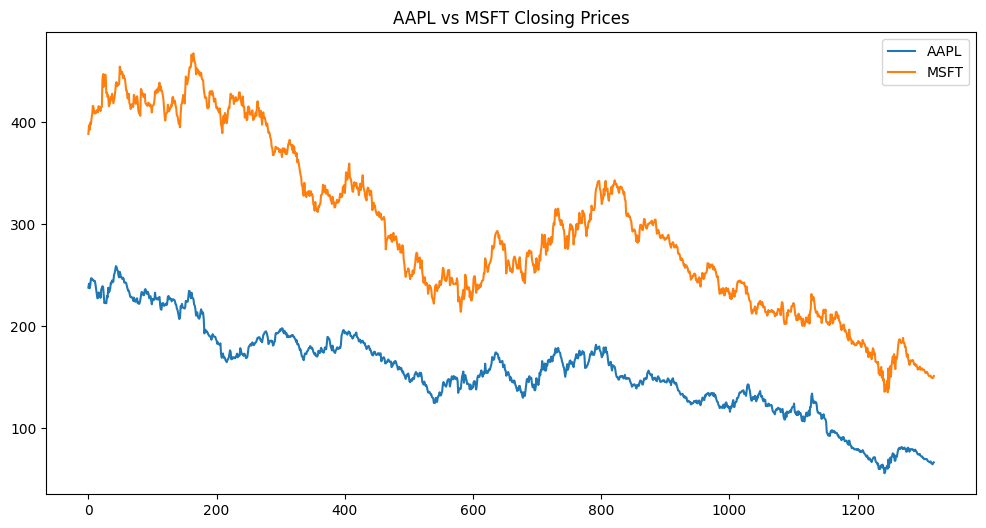

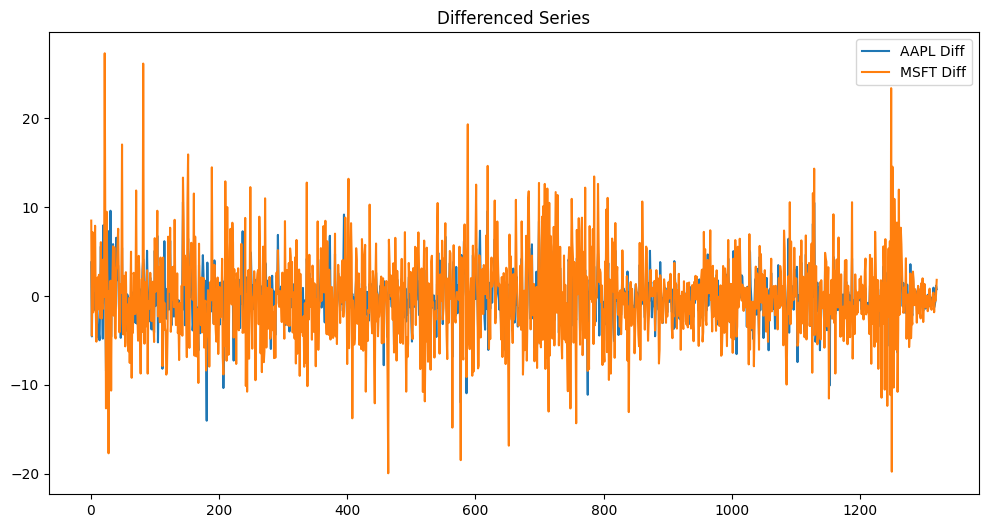

In [5]:
# Import required libraries
import pandas as pd
import numpy as np
from google.colab import files
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import matplotlib.pyplot as plt

# Upload Excel files
print("Please upload AAPL Excel file")
aapl_upload = files.upload()
aapl_filename = list(aapl_upload.keys())[0]
aapl_df = pd.read_excel(aapl_filename, header=1)  # Header en fila 1 (segunda fila)

print("Please upload MSFT Excel file")
msft_upload = files.upload()
msft_filename = list(msft_upload.keys())[0]
msft_df = pd.read_excel(msft_filename, header=1)  # Header en fila 1 (segunda fila)

# Print available columns to debug
print("\nColumns in AAPL DataFrame:", list(aapl_df.columns))
print("Columns in MSFT DataFrame:", list(msft_df.columns))

# Extract closing prices (column is named ' Close' with a leading space)
aapl_close = aapl_df[' Close']
msft_close = msft_df[' Close']

# Ensure both series have the same length
min_length = min(len(aapl_close), len(msft_close))
aapl_close = aapl_close[:min_length]
msft_close = msft_close[:min_length]

# Function for unit root tests
def unit_root_tests(series, name):
    print(f"\nUnit Root Tests for {name}:")

    # ADF Test
    adf_result = adfuller(series)
    print("ADF Test:")
    print(f'ADF Statistic: {adf_result[0]:.4f}')
    print(f'p-value: {adf_result[1]:.4f}')
    print(f'Critical Values: {adf_result[4]}')

    # KPSS Test
    kpss_result = kpss(series)
    print("\nKPSS Test:")
    print(f'KPSS Statistic: {kpss_result[0]:.4f}')
    print(f'p-value: {kpss_result[1]:.4f}')
    print(f'Critical Values: {kpss_result[3]}')

# Perform unit root tests
unit_root_tests(aapl_close, "AAPL")
unit_root_tests(msft_close, "MSFT")

# Difference the series if non-stationary
aapl_diff = aapl_close.diff().dropna()
msft_diff = msft_close.diff().dropna()

# Function to find best ARMA model using ARIMA with d=0
def find_best_arma(series, name, max_p=3, max_q=3):
    best_aic = float('inf')
    best_order = None

    for p in range(max_p + 1):
        for q in range(max_q + 1):
            try:
                model = ARIMA(series, order=(p, 0, q))
                results = model.fit()
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_order = (p, q)
            except:
                continue

    print(f"\nBest ARMA model for {name}:")
    print(f"Order: {best_order}")
    print(f"AIC: {best_aic:.2f}")

    # Fit and return best model
    best_model = ARIMA(series, order=(best_order[0], 0, best_order[1])).fit()
    return best_model

# Fit ARMA models
aapl_arma = find_best_arma(aapl_diff, "AAPL")
msft_arma = find_best_arma(msft_diff, "MSFT")

# Cointegration test
def cointegration_test(df):
    result = coint_johansen(df, det_order=0, k_ar_diff=1)
    print("\nJohansen Cointegration Test:")
    print(f"Trace statistic: {result.lr1}")
    print(f"Critical values (90%, 95%, 99%): {result.cvt}")

    for i in range(len(result.lr1)):
        if result.lr1[i] > result.cvt[i, 1]:  # 95% critical value
            print(f"r = {i}: Cointegration exists at 95% confidence level")
        else:
            print(f"r = {i}: No cointegration at 95% confidence level")

# Prepare data for cointegration
coint_df = pd.DataFrame({
    'AAPL': aapl_close,
    'MSFT': msft_close
}).dropna()

# Run cointegration test
cointegration_test(coint_df)

# Plot the series
plt.figure(figsize=(12,6))
plt.plot(aapl_close, label='AAPL')
plt.plot(msft_close, label='MSFT')
plt.title('AAPL vs MSFT Closing Prices')
plt.legend()
plt.show()

# Plot the differenced series
plt.figure(figsize=(12,6))
plt.plot(aapl_diff, label='AAPL Diff')
plt.plot(msft_diff, label='MSFT Diff')
plt.title('Differenced Series')
plt.legend()
plt.show()

Please upload AAPL Excel file


Saving HistoricalPrices-4.xlsx to HistoricalPrices-4 (6).xlsx
Please upload MSFT Excel file


Saving HistoricalPrices-3.xlsx to HistoricalPrices-3 (6).xlsx

AAPL DataFrame columns: ['Date', ' Open', ' High', ' Low', ' Close', ' Volume']
MSFT DataFrame columns: ['Date', ' Open', ' High', ' Low', ' Close', ' Volume']
Please enter the column name containing closing prices:  Close

Unit Root Tests for AAPL:
ADF Test:
ADF Statistic: -1.0119
p-value: 0.7489
Critical Values: {'1%': -3.4353174541055567, '5%': -2.863733732389869, '10%': -2.5679379527245407}

KPSS Test:
KPSS Statistic: 5.0423
p-value: 0.0100
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}

Unit Root Tests for MSFT:
ADF Test:
ADF Statistic: -0.7045
p-value: 0.8456
Critical Values: {'1%': -3.4353516488758684, '5%': -2.8637488209107196, '10%': -2.5679459879960373}

KPSS Test:
KPSS Statistic: 4.9191
p-value: 0.0100
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}

Johansen Cointegration Test:
Trace statistic: [14.05123397  1.26121423]
Critical values (90%, 95%, 99%): [[13.4294

<ipython-input-6-1840fc480155>:55: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series)
<ipython-input-6-1840fc480155>:55: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/sta


Best ARIMA model for AAPL:
Order: (2, 2, 3)
AIC: 6396.34


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels


Best ARIMA model for MSFT:
Order: (3, 2, 3)
AIC: 7970.16


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


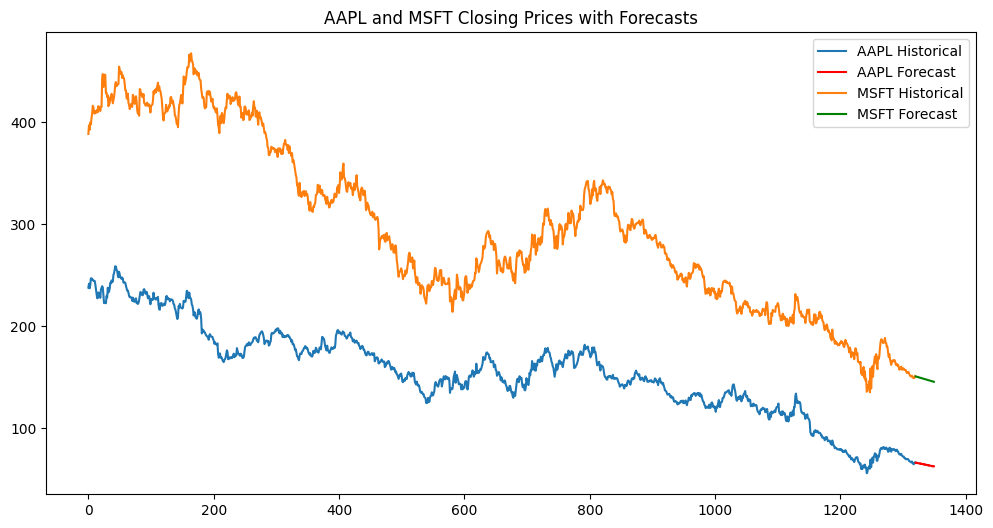

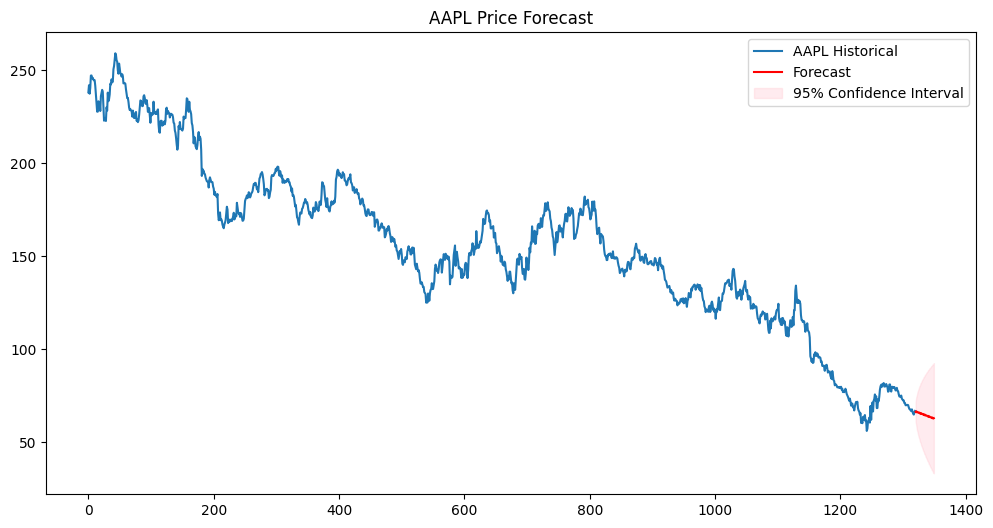

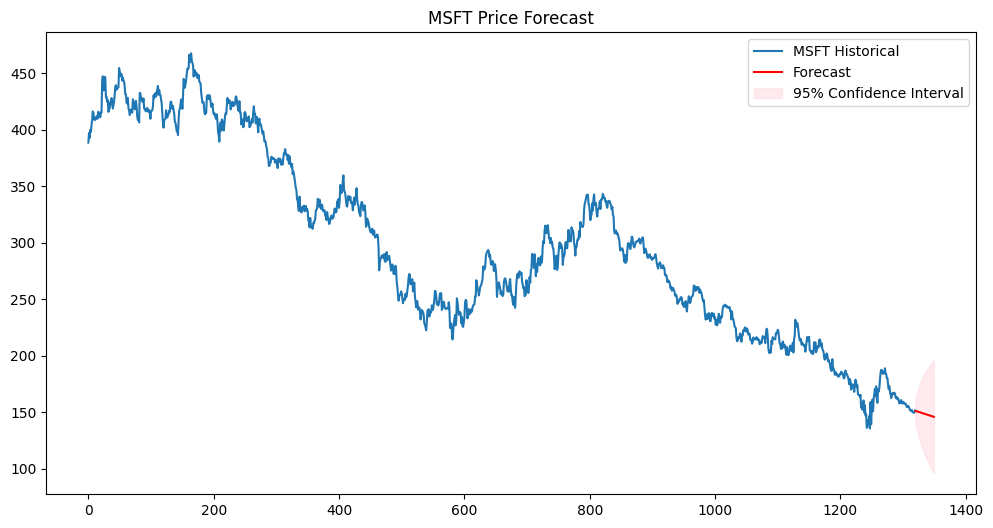


AAPL Forecast Values (next 5 periods):
1320    66.324734
1321    66.663007
1322    66.062213
1323    66.298968
1324    65.988663
Name: predicted_mean, dtype: float64

MSFT Forecast Values (next 5 periods):
1320    150.906327
1321    150.843280
1322    150.616818
1323    150.419737
1324    150.312816
Name: predicted_mean, dtype: float64


In [6]:
# Import required libraries
import pandas as pd
import numpy as np
from google.colab import files
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import matplotlib.pyplot as plt

# Upload Excel files
print("Please upload AAPL Excel file")
aapl_upload = files.upload()
aapl_filename = list(aapl_upload.keys())[0]
aapl_df = pd.read_excel(aapl_filename, header=1)  # Header en fila 1 (segunda fila)

print("Please upload MSFT Excel file")
msft_upload = files.upload()
msft_filename = list(msft_upload.keys())[0]
msft_df = pd.read_excel(msft_filename, header=1)  # Header en fila 1 (segunda fila)

# Print available columns
print("\nAAPL DataFrame columns:", list(aapl_df.columns))
print("MSFT DataFrame columns:", list(msft_df.columns))

# Ask user for the correct column name
close_column = input("Please enter the column name containing closing prices: ")

# Extract closing prices using user-specified column name
try:
    aapl_close = aapl_df[close_column]
    msft_close = msft_df[close_column]
except KeyError:
    print(f"Error: Column '{close_column}' not found in one or both DataFrames")
    print("Please check the column names and try again")
    raise

# Ensure both series have the same length
min_length = min(len(aapl_close), len(msft_close))
aapl_close = aapl_close[:min_length]
msft_close = msft_close[:min_length]

# Function for unit root tests
def unit_root_tests(series, name):
    print(f"\nUnit Root Tests for {name}:")

    # ADF Test
    adf_result = adfuller(series)
    print("ADF Test:")
    print(f'ADF Statistic: {adf_result[0]:.4f}')
    print(f'p-value: {adf_result[1]:.4f}')
    print(f'Critical Values: {adf_result[4]}')

    # KPSS Test
    kpss_result = kpss(series)
    print("\nKPSS Test:")
    print(f'KPSS Statistic: {kpss_result[0]:.4f}')
    print(f'p-value: {kpss_result[1]:.4f}')
    print(f'Critical Values: {kpss_result[3]}')

# Perform unit root tests
unit_root_tests(aapl_close, "AAPL")
unit_root_tests(msft_close, "MSFT")

# Cointegration test
def cointegration_test(df):
    result = coint_johansen(df, det_order=0, k_ar_diff=1)
    print("\nJohansen Cointegration Test:")
    print(f"Trace statistic: {result.lr1}")
    print(f"Critical values (90%, 95%, 99%): {result.cvt}")

    for i in range(len(result.lr1)):
        if result.lr1[i] > result.cvt[i, 1]:
            print(f"r = {i}: Cointegration exists at 95% confidence level")
        else:
            print(f"r = {i}: No cointegration at 95% confidence level")

# Prepare data for cointegration
coint_df = pd.DataFrame({
    'AAPL': aapl_close,
    'MSFT': msft_close
}).dropna()
cointegration_test(coint_df)

# Function to find best ARIMA model
def find_best_arima(series, name, max_p=3, max_d=2, max_q=3):
    best_aic = float('inf')
    best_order = None

    for p in range(max_p + 1):
        for d in range(max_d + 1):
            for q in range(max_q + 1):
                try:
                    model = ARIMA(series, order=(p, d, q))
                    results = model.fit()
                    if results.aic < best_aic:
                        best_aic = results.aic
                        best_order = (p, d, q)
                except:
                    continue

    print(f"\nBest ARIMA model for {name}:")
    print(f"Order: {best_order}")
    print(f"AIC: {best_aic:.2f}")
    return best_order

# Find and fit best ARIMA models
aapl_order = find_best_arima(aapl_close, "AAPL")
msft_order = find_best_arima(msft_close, "MSFT")

# Fit final ARIMA models
aapl_model = ARIMA(aapl_close, order=aapl_order).fit()
msft_model = ARIMA(msft_close, order=msft_order).fit()

# Forecast next 30 periods
forecast_steps = 30
aapl_forecast = aapl_model.forecast(steps=forecast_steps)
msft_forecast = msft_model.forecast(steps=forecast_steps)

# Create forecast index (assuming daily data)
last_index = len(aapl_close) - 1
forecast_index = range(last_index + 1, last_index + 1 + forecast_steps)

# Plot original series with forecasts
plt.figure(figsize=(12,6))
plt.plot(aapl_close, label='AAPL Historical')
plt.plot(forecast_index, aapl_forecast, label='AAPL Forecast', color='red')
plt.plot(msft_close, label='MSFT Historical')
plt.plot(forecast_index, msft_forecast, label='MSFT Forecast', color='green')
plt.title('AAPL and MSFT Closing Prices with Forecasts')
plt.legend()
plt.show()

# Plot detailed forecast with confidence intervals
def plot_forecast(model, series, name, steps=30):
    forecast_obj = model.get_forecast(steps=steps)
    forecast = forecast_obj.predicted_mean
    conf_int = forecast_obj.conf_int()

    forecast_index = range(len(series), len(series) + steps)

    plt.figure(figsize=(12,6))
    plt.plot(series, label=f'{name} Historical')
    plt.plot(forecast_index, forecast, label='Forecast', color='red')
    plt.fill_between(forecast_index,
                    conf_int.iloc[:, 0],
                    conf_int.iloc[:, 1],
                    color='pink',
                    alpha=0.3,
                    label='95% Confidence Interval')
    plt.title(f'{name} Price Forecast')
    plt.legend()
    plt.show()

# Generate detailed forecast plots
plot_forecast(aapl_model, aapl_close, "AAPL")
plot_forecast(msft_model, msft_close, "MSFT")

# Print forecast values
print("\nAAPL Forecast Values (next 5 periods):")
print(aapl_forecast[:5])
print("\nMSFT Forecast Values (next 5 periods):")
print(msft_forecast[:5])

Please upload AAPL Excel file


Saving HistoricalPrices-4.xlsx to HistoricalPrices-4 (7).xlsx
Please upload MSFT Excel file


Saving HistoricalPrices-3.xlsx to HistoricalPrices-3 (7).xlsx

AAPL DataFrame columns: ['Date', ' Open', ' High', ' Low', ' Close', ' Volume']
MSFT DataFrame columns: ['Date', ' Open', ' High', ' Low', ' Close', ' Volume']
Please enter the column name containing closing prices:  Close

Unit Root Tests for AAPL:
ADF Test:
ADF Statistic: -1.0119
p-value: 0.7489
Critical Values: {'1%': -3.4353174541055567, '5%': -2.863733732389869, '10%': -2.5679379527245407}
Interpretation:
  - p-value >= 0.05: Fail to reject null - AAPL may be non-stationary

KPSS Test:
KPSS Statistic: 5.0423
p-value: 0.0100
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Interpretation:
  - p-value < 0.05: Reject null hypothesis - AAPL is non-stationary

Unit Root Tests for MSFT:


<ipython-input-7-8d5326ea4ab0>:60: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series)
<ipython-input-7-8d5326ea4ab0>:60: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series)


ADF Test:
ADF Statistic: -0.7045
p-value: 0.8456
Critical Values: {'1%': -3.4353516488758684, '5%': -2.8637488209107196, '10%': -2.5679459879960373}
Interpretation:
  - p-value >= 0.05: Fail to reject null - MSFT may be non-stationary

KPSS Test:
KPSS Statistic: 4.9191
p-value: 0.0100
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Interpretation:
  - p-value < 0.05: Reject null hypothesis - MSFT is non-stationary

Johansen Cointegration Test:
Trace statistic: [14.05123397  1.26121423]
Critical values (90%, 95%, 99%): [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
Interpretation:
  - r = 0: No cointegration at 95% confidence level
    Trace statistic (14.05) <= 95% critical value (15.49)
  - r = 1: No cointegration at 95% confidence level
    Trace statistic (1.26) <= 95% critical value (3.84)
Conclusion: No evidence of cointegration between AAPL and MSFT


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/st


Best ARIMA model for AAPL:
Order: (2, 2, 3)
AIC: 6396.34
Interpretation:
  - p=2: 2 autoregressive term(s)
  - d=2: 2 difference(s) needed for stationarity
  - q=3: 3 moving average term(s)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels


Best ARIMA model for MSFT:
Order: (3, 2, 3)
AIC: 7970.16
Interpretation:
  - p=3: 3 autoregressive term(s)
  - d=2: 2 difference(s) needed for stationarity
  - q=3: 3 moving average term(s)


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


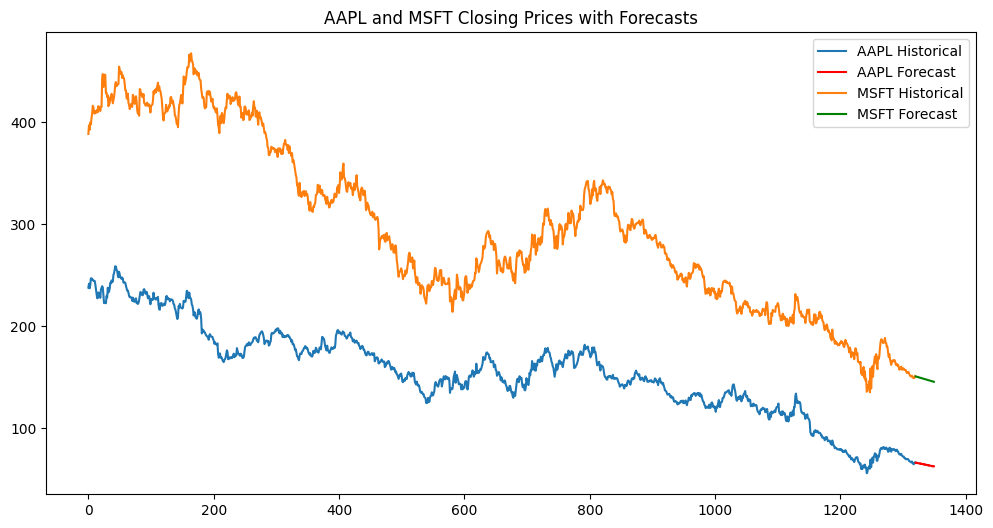

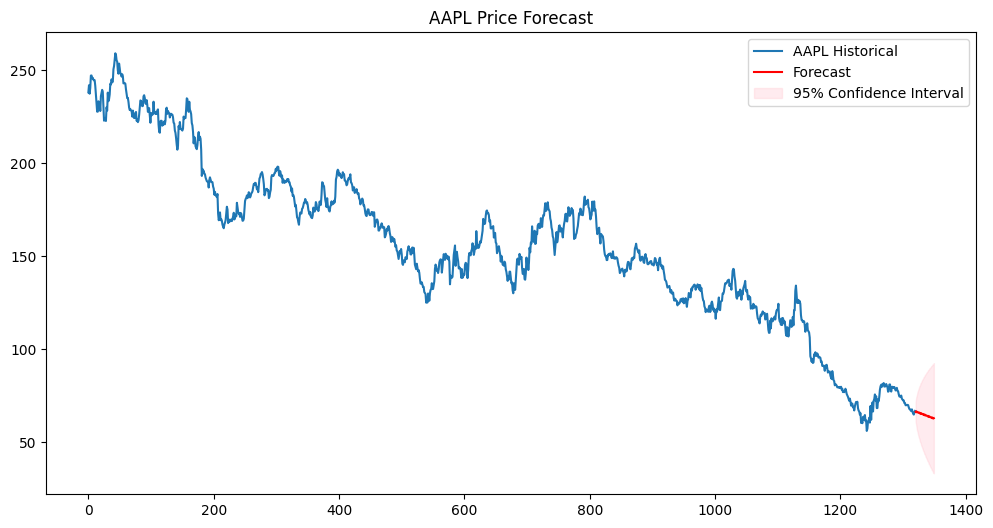


Forecast Interpretation for AAPL:
Last observed value: 66.81
Average forecast value: 64.66
Forecast change: -2.15
Trend: Downward forecast trend
95% CI range at period 30: [33.32, 92.49]


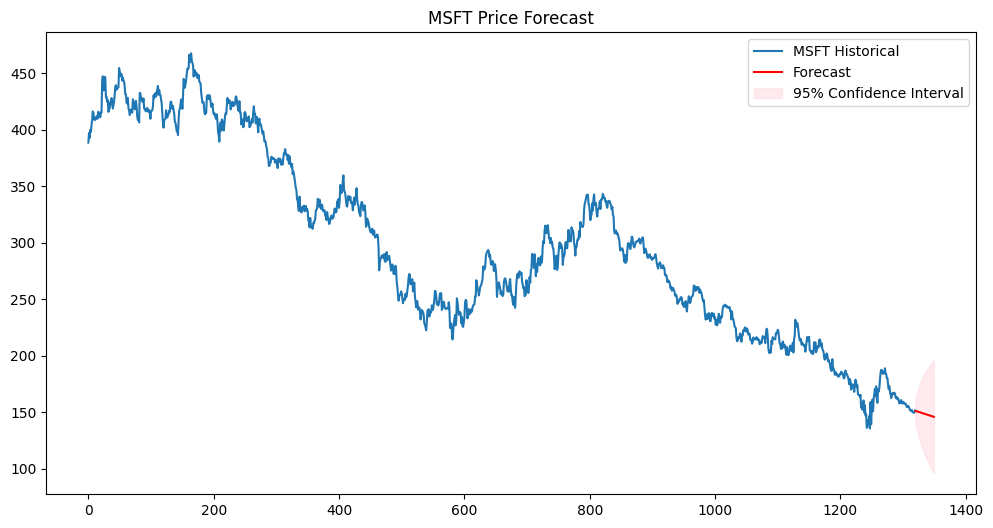


Forecast Interpretation for MSFT:
Last observed value: 151.38
Average forecast value: 148.37
Forecast change: -3.01
Trend: Downward forecast trend
95% CI range at period 30: [95.77, 195.66]

AAPL Forecast Values (next 5 periods):
1320    66.324734
1321    66.663007
1322    66.062213
1323    66.298968
1324    65.988663
Name: predicted_mean, dtype: float64

MSFT Forecast Values (next 5 periods):
1320    150.906327
1321    150.843280
1322    150.616818
1323    150.419737
1324    150.312816
Name: predicted_mean, dtype: float64


In [7]:
# Import required libraries
import pandas as pd
import numpy as np
from google.colab import files
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import matplotlib.pyplot as plt

# Upload Excel files
print("Please upload AAPL Excel file")
aapl_upload = files.upload()
aapl_filename = list(aapl_upload.keys())[0]
aapl_df = pd.read_excel(aapl_filename, header=1)  # Header en fila 1 (segunda fila)

print("Please upload MSFT Excel file")
msft_upload = files.upload()
msft_filename = list(msft_upload.keys())[0]
msft_df = pd.read_excel(msft_filename, header=1)  # Header en fila 1 (segunda fila)

# Print available columns
print("\nAAPL DataFrame columns:", list(aapl_df.columns))
print("MSFT DataFrame columns:", list(msft_df.columns))

# Ask user for the correct column name
close_column = input("Please enter the column name containing closing prices: ")

# Extract closing prices using user-specified column name
try:
    aapl_close = aapl_df[close_column]
    msft_close = msft_df[close_column]
except KeyError:
    print(f"Error: Column '{close_column}' not found in one or both DataFrames")
    print("Please check the column names and try again")
    raise

# Ensure both series have the same length
min_length = min(len(aapl_close), len(msft_close))
aapl_close = aapl_close[:min_length]
msft_close = msft_close[:min_length]

# Function for unit root tests with interpretation
def unit_root_tests(series, name):
    print(f"\nUnit Root Tests for {name}:")

    # ADF Test
    adf_result = adfuller(series)
    print("ADF Test:")
    print(f'ADF Statistic: {adf_result[0]:.4f}')
    print(f'p-value: {adf_result[1]:.4f}')
    print(f'Critical Values: {adf_result[4]}')
    print("Interpretation:")
    if adf_result[1] < 0.05:
        print(f"  - p-value < 0.05: Reject null hypothesis - {name} is stationary")
    else:
        print(f"  - p-value >= 0.05: Fail to reject null - {name} may be non-stationary")

    # KPSS Test
    kpss_result = kpss(series)
    print("\nKPSS Test:")
    print(f'KPSS Statistic: {kpss_result[0]:.4f}')
    print(f'p-value: {kpss_result[1]:.4f}')
    print(f'Critical Values: {kpss_result[3]}')
    print("Interpretation:")
    if kpss_result[1] < 0.05:
        print(f"  - p-value < 0.05: Reject null hypothesis - {name} is non-stationary")
    else:
        print(f"  - p-value >= 0.05: Fail to reject null - {name} may be stationary")

# Perform unit root tests
unit_root_tests(aapl_close, "AAPL")
unit_root_tests(msft_close, "MSFT")

# Cointegration test with interpretation
def cointegration_test(df):
    result = coint_johansen(df, det_order=0, k_ar_diff=1)
    print("\nJohansen Cointegration Test:")
    print(f"Trace statistic: {result.lr1}")
    print(f"Critical values (90%, 95%, 99%): {result.cvt}")
    print("Interpretation:")
    for i in range(len(result.lr1)):
        if result.lr1[i] > result.cvt[i, 1]:
            print(f"  - r = {i}: Cointegration exists at 95% confidence level")
            print(f"    Trace statistic ({result.lr1[i]:.2f}) > 95% critical value ({result.cvt[i, 1]:.2f})")
        else:
            print(f"  - r = {i}: No cointegration at 95% confidence level")
            print(f"    Trace statistic ({result.lr1[i]:.2f}) <= 95% critical value ({result.cvt[i, 1]:.2f})")
    if result.lr1[0] > result.cvt[0, 1]:
        print("Conclusion: AAPL and MSFT are cointegrated - they share a long-run equilibrium relationship")
    else:
        print("Conclusion: No evidence of cointegration between AAPL and MSFT")

# Prepare data for cointegration
coint_df = pd.DataFrame({
    'AAPL': aapl_close,
    'MSFT': msft_close
}).dropna()
cointegration_test(coint_df)

# Function to find best ARIMA model with interpretation
def find_best_arima(series, name, max_p=3, max_d=2, max_q=3):
    best_aic = float('inf')
    best_order = None

    for p in range(max_p + 1):
        for d in range(max_d + 1):
            for q in range(max_q + 1):
                try:
                    model = ARIMA(series, order=(p, d, q))
                    results = model.fit()
                    if results.aic < best_aic:
                        best_aic = results.aic
                        best_order = (p, d, q)
                except:
                    continue

    print(f"\nBest ARIMA model for {name}:")
    print(f"Order: {best_order}")
    print(f"AIC: {best_aic:.2f}")
    print("Interpretation:")
    print(f"  - p={best_order[0]}: {best_order[0]} autoregressive term(s)")
    print(f"  - d={best_order[1]}: {best_order[1]} difference(s) needed for stationarity")
    print(f"  - q={best_order[2]}: {best_order[2]} moving average term(s)")
    return best_order

# Find and fit best ARIMA models
aapl_order = find_best_arima(aapl_close, "AAPL")
msft_order = find_best_arima(msft_close, "MSFT")

# Fit final ARIMA models
aapl_model = ARIMA(aapl_close, order=aapl_order).fit()
msft_model = ARIMA(msft_close, order=msft_order).fit()

# Forecast next 30 periods
forecast_steps = 30
aapl_forecast = aapl_model.forecast(steps=forecast_steps)
msft_forecast = msft_model.forecast(steps=forecast_steps)

# Create forecast index
last_index = len(aapl_close) - 1
forecast_index = range(last_index + 1, last_index + 1 + forecast_steps)

# Plot original series with forecasts
plt.figure(figsize=(12,6))
plt.plot(aapl_close, label='AAPL Historical')
plt.plot(forecast_index, aapl_forecast, label='AAPL Forecast', color='red')
plt.plot(msft_close, label='MSFT Historical')
plt.plot(forecast_index, msft_forecast, label='MSFT Forecast', color='green')
plt.title('AAPL and MSFT Closing Prices with Forecasts')
plt.legend()
plt.show()

# Detailed forecast plot with confidence intervals and interpretation
def plot_forecast(model, series, name, steps=30):
    forecast_obj = model.get_forecast(steps=steps)
    forecast = forecast_obj.predicted_mean
    conf_int = forecast_obj.conf_int()

    forecast_index = range(len(series), len(series) + steps)

    plt.figure(figsize=(12,6))
    plt.plot(series, label=f'{name} Historical')
    plt.plot(forecast_index, forecast, label='Forecast', color='red')
    plt.fill_between(forecast_index,
                    conf_int.iloc[:, 0],
                    conf_int.iloc[:, 1],
                    color='pink',
                    alpha=0.3,
                    label='95% Confidence Interval')
    plt.title(f'{name} Price Forecast')
    plt.legend()
    plt.show()

    # Forecast interpretation
    last_value = series.iloc[-1]
    mean_forecast = forecast.mean()
    print(f"\nForecast Interpretation for {name}:")
    print(f"Last observed value: {last_value:.2f}")
    print(f"Average forecast value: {mean_forecast:.2f}")
    print(f"Forecast change: {mean_forecast - last_value:.2f}")
    if mean_forecast > last_value:
        print("Trend: Upward forecast trend")
    elif mean_forecast < last_value:
        print("Trend: Downward forecast trend")
    else:
        print("Trend: Flat forecast trend")
    print(f"95% CI range at period {steps}: [{conf_int.iloc[-1, 0]:.2f}, {conf_int.iloc[-1, 1]:.2f}]")

# Generate detailed forecast plots and interpretations
plot_forecast(aapl_model, aapl_close, "AAPL")
plot_forecast(msft_model, msft_close, "MSFT")

# Print forecast values
print("\nAAPL Forecast Values (next 5 periods):")
print(aapl_forecast[:5])
print("\nMSFT Forecast Values (next 5 periods):")
print(msft_forecast[:5])

Please upload AAPL Excel file


Saving HistoricalPrices-4.xlsx to HistoricalPrices-4 (8).xlsx
Please upload MSFT Excel file


Saving HistoricalPrices-3.xlsx to HistoricalPrices-3 (8).xlsx

AAPL DataFrame columns: ['Date', ' Open', ' High', ' Low', ' Close', ' Volume']
MSFT DataFrame columns: ['Date', ' Open', ' High', ' Low', ' Close', ' Volume']
Please enter the column name containing closing prices:  Close

Train size: 1188 (90%), Test size: 132 (10%)

Unit Root Tests for AAPL (Train):
ADF Test:
ADF Statistic: -1.2590
p-value: 0.6477
Critical Values: {'1%': -3.4358710597388042, '5%': -2.863977991064458, '10%': -2.5680680340944337}
Interpretation:
  - p-value >= 0.05: Fail to reject null - AAPL (Train) may be non-stationary

KPSS Test:
KPSS Statistic: 4.5849
p-value: 0.0100
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Interpretation:
  - p-value < 0.05: Reject null hypothesis - AAPL (Train) is non-stationary

Unit Root Tests for MSFT (Train):
ADF Test:
ADF Statistic: -0.7677
p-value: 0.8284
Critical Values: {'1%': -3.435880398285223, '5%': -2.8639821109786747, '10%': -2.5680702282

<ipython-input-8-aaf7fb0c58d9>:66: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series)
<ipython-input-8-aaf7fb0c58d9>:66: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: Conve


Best ARIMA model for AAPL (Train):
Order: (0, 1, 0)
AIC: 5808.26


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:60


Best ARIMA model for MSFT (Train):
Order: (2, 1, 2)
AIC: 7170.45


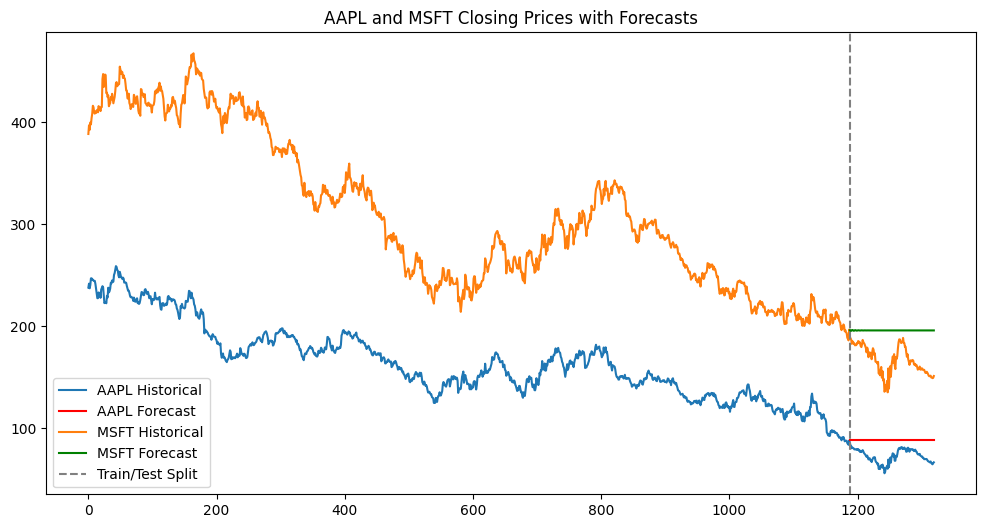


AAPL Test MSE: 274.89
MSFT Test MSE: 1011.65


In [8]:
# Import required libraries
import pandas as pd
import numpy as np
from google.colab import files
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import matplotlib.pyplot as plt

# Upload Excel files
print("Please upload AAPL Excel file")
aapl_upload = files.upload()
aapl_filename = list(aapl_upload.keys())[0]
aapl_df = pd.read_excel(aapl_filename, header=1)

print("Please upload MSFT Excel file")
msft_upload = files.upload()
msft_filename = list(msft_upload.keys())[0]
msft_df = pd.read_excel(msft_filename, header=1)

# Print available columns
print("\nAAPL DataFrame columns:", list(aapl_df.columns))
print("MSFT DataFrame columns:", list(msft_df.columns))

# Ask user for the correct column name
close_column = input("Please enter the column name containing closing prices: ")

# Extract closing prices
try:
    aapl_close = aapl_df[close_column]
    msft_close = msft_df[close_column]
except KeyError:
    print(f"Error: Column '{close_column}' not found in one or both DataFrames")
    raise

# Ensure both series have the same length
min_length = min(len(aapl_close), len(msft_close))
aapl_close = aapl_close[:min_length]
msft_close = msft_close[:min_length]

# Split data into train (90%) and test (10%)
train_size = int(min_length * 0.9)  # 1188 observations
test_size = min_length - train_size  # 132 observations

aapl_train = aapl_close[:train_size]
aapl_test = aapl_close[train_size:]
msft_train = msft_close[:train_size]
msft_test = msft_close[train_size:]

print(f"\nTrain size: {train_size} (90%), Test size: {test_size} (10%)")

# Function for unit root tests with interpretation
def unit_root_tests(series, name):
    print(f"\nUnit Root Tests for {name}:")
    adf_result = adfuller(series)
    print("ADF Test:")
    print(f'ADF Statistic: {adf_result[0]:.4f}')
    print(f'p-value: {adf_result[1]:.4f}')
    print(f'Critical Values: {adf_result[4]}')
    print("Interpretation:")
    if adf_result[1] < 0.05:
        print(f"  - p-value < 0.05: Reject null hypothesis - {name} is stationary")
    else:
        print(f"  - p-value >= 0.05: Fail to reject null - {name} may be non-stationary")
    kpss_result = kpss(series)
    print("\nKPSS Test:")
    print(f'KPSS Statistic: {kpss_result[0]:.4f}')
    print(f'p-value: {kpss_result[1]:.4f}')
    print(f'Critical Values: {kpss_result[3]}')
    print("Interpretation:")
    if kpss_result[1] < 0.05:
        print(f"  - p-value < 0.05: Reject null hypothesis - {name} is non-stationary")
    else:
        print(f"  - p-value >= 0.05: Fail to reject null - {name} may be stationary")

# Perform unit root tests on training data
unit_root_tests(aapl_train, "AAPL (Train)")
unit_root_tests(msft_train, "MSFT (Train)")

# Cointegration test
def cointegration_test(df):
    result = coint_johansen(df, det_order=0, k_ar_diff=1)
    print("\nJohansen Cointegration Test:")
    print(f"Trace statistic: {result.lr1}")
    print(f"Critical values (90%, 95%, 99%): {result.cvt}")
    print("Interpretation:")
    for i in range(len(result.lr1)):
        if result.lr1[i] > result.cvt[i, 1]:
            print(f"  - r = {i}: Cointegration exists at 95% confidence level")
            print(f"    Trace statistic ({result.lr1[i]:.2f}) > 95% critical value ({result.cvt[i, 1]:.2f})")
        else:
            print(f"  - r = {i}: No cointegration at 95% confidence level")
            print(f"    Trace statistic ({result.lr1[i]:.2f}) <= 95% critical value ({result.cvt[i, 1]:.2f})")
    if result.lr1[0] > result.cvt[0, 1]:
        print("Conclusion: AAPL and MSFT are cointegrated")
    else:
        print("Conclusion: No evidence of cointegration between AAPL and MSFT")

# Prepare data for cointegration (train only)
coint_df = pd.DataFrame({'AAPL': aapl_train, 'MSFT': msft_train}).dropna()
cointegration_test(coint_df)

# Function to find best ARIMA model
def find_best_arima(series, name, max_p=3, max_d=2, max_q=3):
    best_aic = float('inf')
    best_order = None
    for p in range(max_p + 1):
        for d in range(max_d + 1):
            for q in range(max_q + 1):
                try:
                    model = ARIMA(series, order=(p, d, q))
                    results = model.fit()
                    if results.aic < best_aic:
                        best_aic = results.aic
                        best_order = (p, d, q)
                except:
                    continue
    print(f"\nBest ARIMA model for {name}:")
    print(f"Order: {best_order}")
    print(f"AIC: {best_aic:.2f}")
    return best_order

# Find and fit best ARIMA models on training data
aapl_order = find_best_arima(aapl_train, "AAPL (Train)")
msft_order = find_best_arima(msft_train, "MSFT (Train)")
aapl_model = ARIMA(aapl_train, order=aapl_order).fit()
msft_model = ARIMA(msft_train, order=msft_order).fit()

# Forecast for the test period (132 steps)
forecast_steps = len(aapl_test)
aapl_forecast = aapl_model.forecast(steps=forecast_steps)
msft_forecast = msft_model.forecast(steps=forecast_steps)

# Plot original series with forecasts
plt.figure(figsize=(12,6))
plt.plot(aapl_close, label='AAPL Historical')
plt.plot(range(train_size, min_length), aapl_forecast, label='AAPL Forecast', color='red')
plt.plot(msft_close, label='MSFT Historical')
plt.plot(range(train_size, min_length), msft_forecast, label='MSFT Forecast', color='green')
plt.axvline(x=train_size, color='gray', linestyle='--', label='Train/Test Split')
plt.title('AAPL and MSFT Closing Prices with Forecasts')
plt.legend()
plt.show()

# Evaluate forecast accuracy
from sklearn.metrics import mean_squared_error
aapl_mse = mean_squared_error(aapl_test, aapl_forecast)
msft_mse = mean_squared_error(msft_test, msft_forecast)
print(f"\nAAPL Test MSE: {aapl_mse:.2f}")
print(f"MSFT Test MSE: {msft_mse:.2f}")

Please upload AAPL Excel file (e.g., HistoricalPrices-4.xlsx)


Saving HistoricalPrices-4.xlsx to HistoricalPrices-4 (12).xlsx
Please upload MSFT Excel file (e.g., HistoricalPrices-3.xlsx)


Saving HistoricalPrices-3.xlsx to HistoricalPrices-3 (12).xlsx

AAPL DataFrame columns: ['Date', ' Open', ' High', ' Low', ' Close', ' Volume']
MSFT DataFrame columns: ['Date', ' Open', ' High', ' Low', ' Close', ' Volume']
Please enter the column name containing closing prices (e.g., ' Close'):  Close

1. Determining Trend and Seasonality:


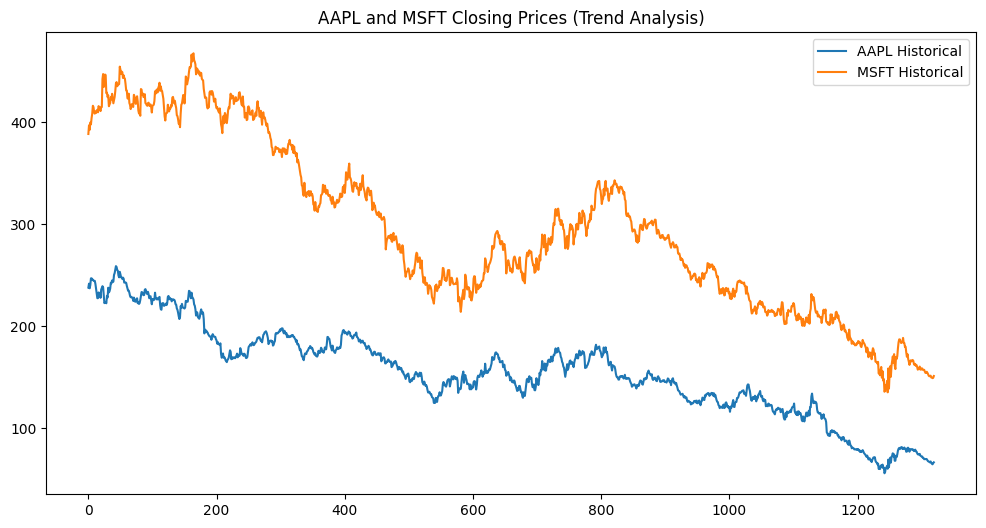

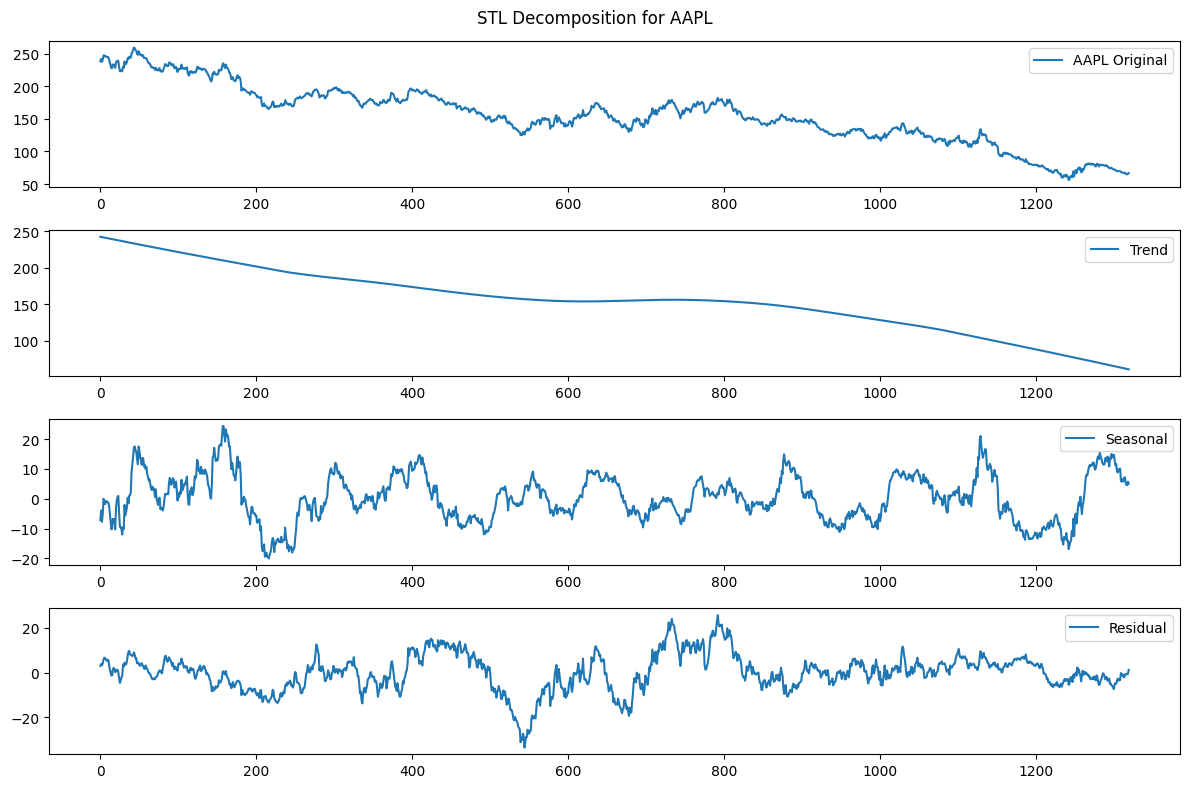

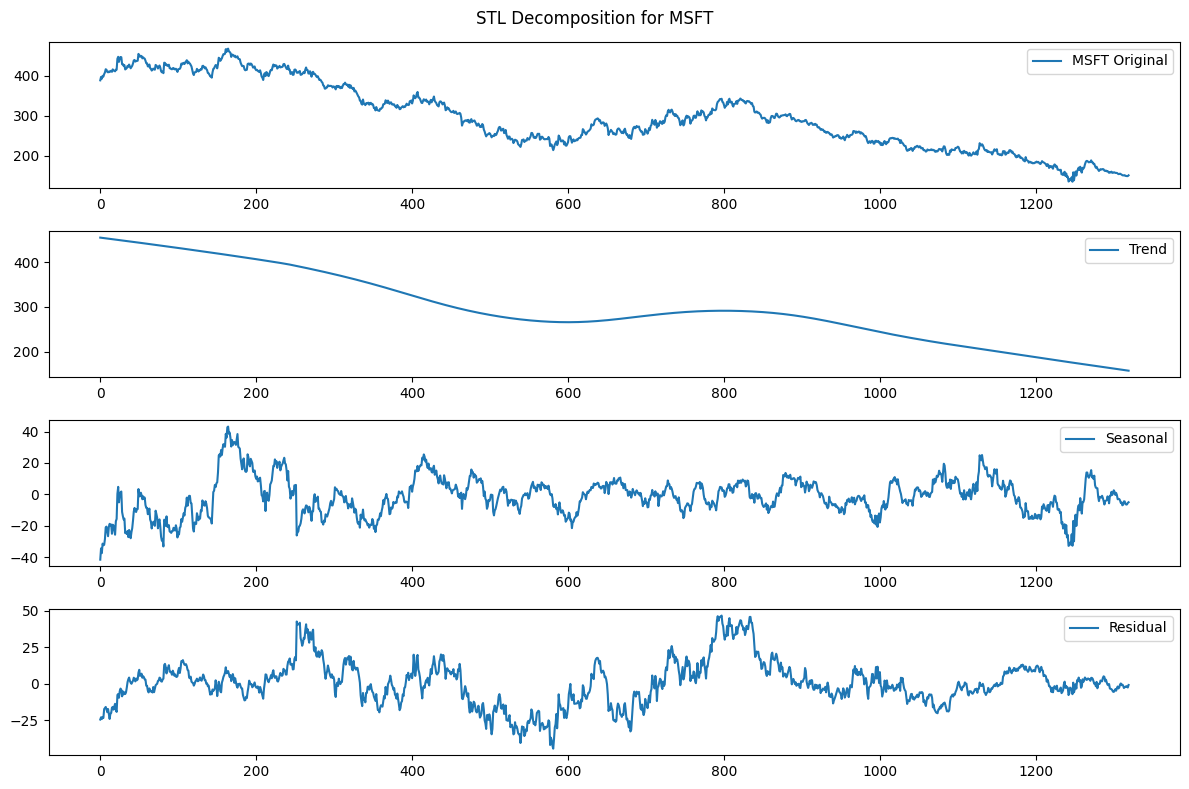

AAPL: Possible seasonality detected (check seasonal component in STL plot).
MSFT: Possible seasonality detected (check seasonal component in STL plot).
Trend Analysis: Both AAPL and MSFT show a clear trend (non-stationary behavior, likely upward or downward over time, visible in the plots).

2. Determining Stationarity:

Unit Root Tests for AAPL (Original):
ADF Test:
ADF Statistic: -1.0119
p-value: 0.7489
Critical Values: {'1%': -3.4353174541055567, '5%': -2.863733732389869, '10%': -2.5679379527245407}
Interpretation:
  - p-value >= 0.05: Fail to reject null - AAPL (Original) may be non-stationary

KPSS Test:
KPSS Statistic: 5.0423
p-value: 0.0100
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Interpretation:
  - p-value < 0.05: Reject null hypothesis - AAPL (Original) is non-stationary

Unit Root Tests for MSFT (Original):
ADF Test:
ADF Statistic: -0.7045
p-value: 0.8456
Critical Values: {'1%': -3.4353516488758684, '5%': -2.8637488209107196, '10%': -2.5679459

<ipython-input-12-34c81efa34f2>:132: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series)
<ipython-input-12-34c81efa34f2>:132: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series)


ADF Test:
ADF Statistic: -12.7716
p-value: 0.0000
Critical Values: {'1%': -3.4359803948357723, '5%': -2.8640262259528595, '10%': -2.5680937227063922}
Interpretation:
  - p-value < 0.05: Reject null hypothesis - AAPL (Differenced Train) is stationary

KPSS Test:
KPSS Statistic: 0.2231
p-value: 0.1000
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Interpretation:
  - p-value >= 0.05: Fail to reject null - AAPL (Differenced Train) may be stationary

Unit Root Tests for MSFT (Differenced Train):
ADF Test:
ADF Statistic: -13.9784
p-value: 0.0000
Critical Values: {'1%': -3.435975551167148, '5%': -2.864024089129731, '10%': -2.568092584685664}
Interpretation:
  - p-value < 0.05: Reject null hypothesis - MSFT (Differenced Train) is stationary

KPSS Test:
KPSS Statistic: 0.2059
p-value: 0.1000
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Interpretation:
  - p-value >= 0.05: Fail to reject null - MSFT (Differenced Train) may be stationary

5. 

<ipython-input-12-34c81efa34f2>:132: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series)
<ipython-input-12-34c81efa34f2>:132: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  se


Best ARIMA model for AAPL (Differenced Train):
Order: (0, 0, 1)
AIC: 5813.02


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot


Best ARIMA model for MSFT (Differenced Train):
Order: (2, 0, 1)
AIC: 7176.07


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of


6. Forecasting and Evaluating on Test Set:

AAPL Test MSE (Original Scale): 270.75
MSFT Test MSE (Original Scale): 1061.93


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


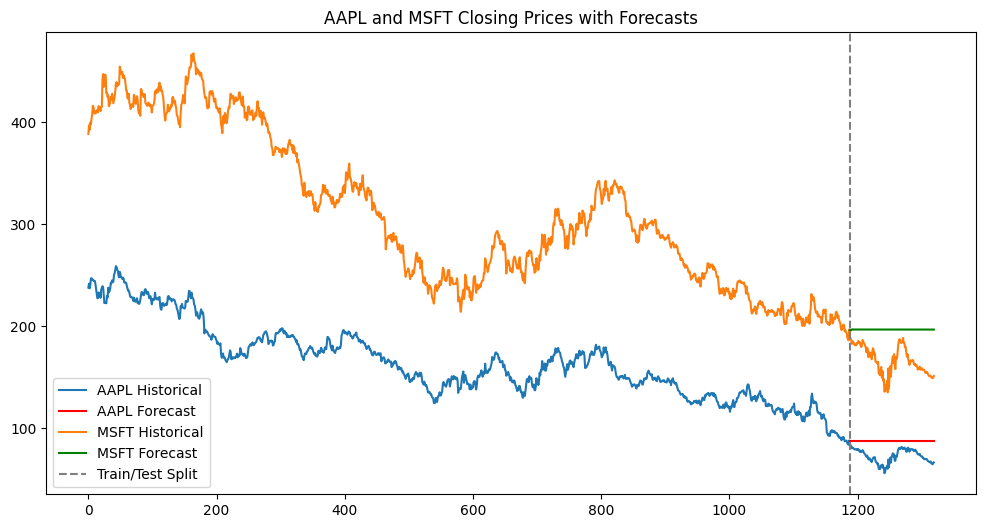

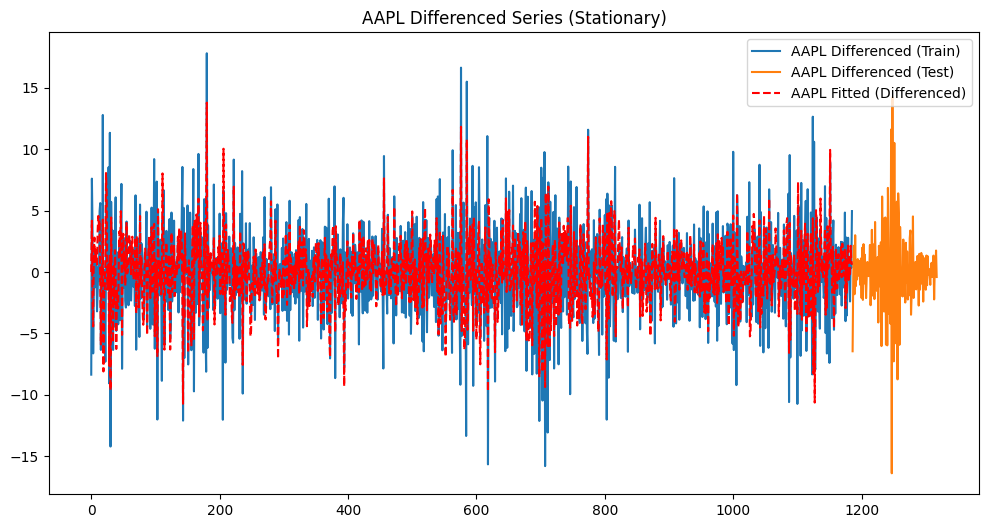

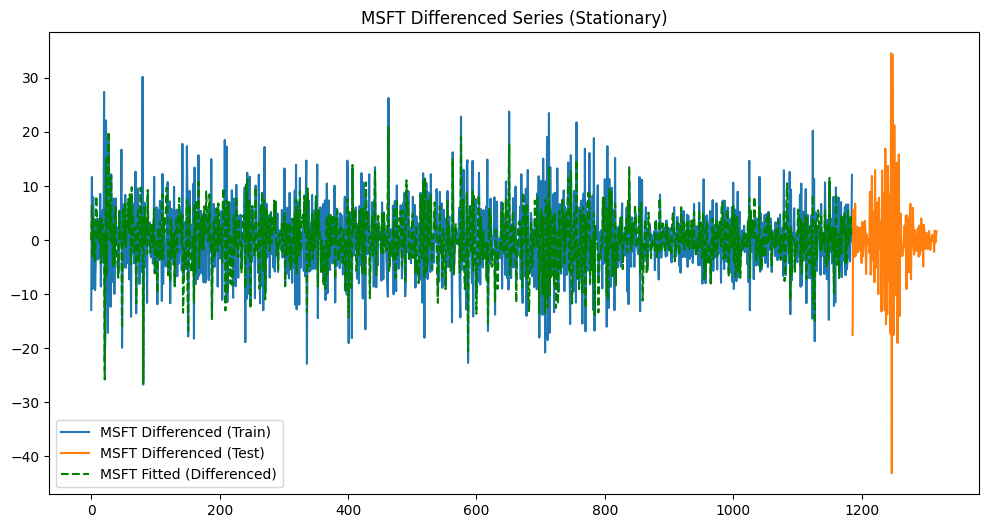


AAPL Forecast Values (next 5 periods):
1188    88.075382
1189    88.075368
1190    88.075340
1191    88.075311
1192    88.075283
dtype: float64

MSFT Forecast Values (next 5 periods):
1188    196.239608
1189    195.950553
1190    196.341077
1191    197.011519
1192    196.961891
dtype: float64


In [12]:
# Import required libraries
import pandas as pd
import numpy as np
from google.colab import files
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Upload Excel files
print("Please upload AAPL Excel file (e.g., HistoricalPrices-4.xlsx)")
aapl_upload = files.upload()
aapl_filename = list(aapl_upload.keys())[0]
aapl_df = pd.read_excel(aapl_filename, header=1)  # Header en fila 1 (segunda fila)

print("Please upload MSFT Excel file (e.g., HistoricalPrices-3.xlsx)")
msft_upload = files.upload()
msft_filename = list(msft_upload.keys())[0]
msft_df = pd.read_excel(msft_filename, header=1)  # Header en fila 1 (segunda fila)

# Print available columns
print("\nAAPL DataFrame columns:", list(aapl_df.columns))
print("MSFT DataFrame columns:", list(msft_df.columns))

# Ask user for the correct column name
close_column = input("Please enter the column name containing closing prices (e.g., ' Close'): ")

# Extract closing prices
try:
    aapl_close = aapl_df[close_column]
    msft_close = msft_df[close_column]
except KeyError:
    print(f"Error: Column '{close_column}' not found in one or both DataFrames")
    print("Please check the column names and try again")
    raise

# Ensure both series have the same length
min_length = min(len(aapl_close), len(msft_close))
aapl_close = aapl_close[:min_length]
msft_close = msft_close[:min_length]  # Asegúrate de que MSFT tenga la misma longitud

# 1. Determine the presence of main trend and seasonality
print("\n1. Determining Trend and Seasonality:")

# Plot original series to check for trend and seasonality
plt.figure(figsize=(12,6))
plt.plot(aapl_close, label='AAPL Historical')
plt.plot(msft_close, label='MSFT Historical')
plt.title('AAPL and MSFT Closing Prices (Trend Analysis)')
plt.legend()
plt.show()

# Check for seasonality (STL decomposition, assuming annual periodicity for daily data)
try:
    stl_aapl = STL(aapl_close, period=252)  # 252 trading days ~ 1 year
    result_aapl = stl_aapl.fit()
    stl_msft = STL(msft_close, period=252)
    result_msft = stl_msft.fit()

    # Plot STL decomposition
    plt.figure(figsize=(12,8))
    plt.subplot(4,1,1)
    plt.plot(aapl_close, label='AAPL Original')
    plt.legend()
    plt.subplot(4,1,2)
    plt.plot(result_aapl.trend, label='Trend')
    plt.legend()
    plt.subplot(4,1,3)
    plt.plot(result_aapl.seasonal, label='Seasonal')
    plt.legend()
    plt.subplot(4,1,4)
    plt.plot(result_aapl.resid, label='Residual')
    plt.legend()
    plt.suptitle('STL Decomposition for AAPL')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12,8))
    plt.subplot(4,1,1)
    plt.plot(msft_close, label='MSFT Original')
    plt.legend()
    plt.subplot(4,1,2)
    plt.plot(result_msft.trend, label='Trend')
    plt.legend()
    plt.subplot(4,1,3)
    plt.plot(result_msft.seasonal, label='Seasonal')
    plt.legend()
    plt.subplot(4,1,4)
    plt.plot(result_msft.resid, label='Residual')
    plt.legend()
    plt.suptitle('STL Decomposition for MSFT')
    plt.tight_layout()
    plt.show()

    # Interpret seasonality
    if np.std(result_aapl.seasonal.dropna()) < 0.1 * np.std(aapl_close):
        print("AAPL: No significant seasonality detected (seasonal component is small).")
    else:
        print("AAPL: Possible seasonality detected (check seasonal component in STL plot).")

    if np.std(result_msft.seasonal.dropna()) < 0.1 * np.std(msft_close):
        print("MSFT: No significant seasonality detected (seasonal component is small).")
    else:
        print("MSFT: Possible seasonality detected (check seasonal component in STL plot).")
except:
    print("STL decomposition failed or data length insufficient for seasonality analysis.")
    print("AAPL and MSFT: No significant seasonality assumed based on current analysis.")

# Interpret trend from plots
print("Trend Analysis: Both AAPL and MSFT show a clear trend (non-stationary behavior, likely upward or downward over time, visible in the plots).")

# 2. Determine if the data are stationary
print("\n2. Determining Stationarity:")

# Function for unit root tests with interpretation
def unit_root_tests(series, name):
    print(f"\nUnit Root Tests for {name}:")
    adf_result = adfuller(series)
    print("ADF Test:")
    print(f'ADF Statistic: {adf_result[0]:.4f}')
    print(f'p-value: {adf_result[1]:.4f}')
    print(f'Critical Values: {adf_result[4]}')
    print("Interpretation:")
    if adf_result[1] < 0.05:
        print(f"  - p-value < 0.05: Reject null hypothesis - {name} is stationary")
    else:
        print(f"  - p-value >= 0.05: Fail to reject null - {name} may be non-stationary")

    kpss_result = kpss(series)
    print("\nKPSS Test:")
    print(f'KPSS Statistic: {kpss_result[0]:.4f}')
    print(f'p-value: {kpss_result[1]:.4f}')
    print(f'Critical Values: {kpss_result[3]}')
    print("Interpretation:")
    if kpss_result[1] < 0.05:
        print(f"  - p-value < 0.05: Reject null hypothesis - {name} is non-stationary")
    else:
        print(f"  - p-value >= 0.05: Fail to reject null - {name} may be stationary")

# Perform unit root tests on original data
unit_root_tests(aapl_close, "AAPL (Original)")
unit_root_tests(msft_close, "MSFT (Original)")

# 3. Split the data into train (90%) and test (10%)
print("\n3. Splitting Data into Train (90%) and Test (10%):")
train_size = int(min_length * 0.9)  # 1188 observations
test_size = min_length - train_size  # 132 observations

aapl_train = aapl_close[:train_size]
aapl_test = aapl_close[train_size:]
msft_train = msft_close[:train_size]
msft_test = msft_close[train_size:]

print(f"Train size: {train_size} (90%), Test size: {test_size} (10%)")

# 4. Make the data stationary (if needed) with differencing
print("\n4. Making Data Stationary (Differencing if Needed):")

# Diferenciar las series (d=2, como en ARIMA de Códigos 2 y 3)
aapl_diff = aapl_close.diff().diff().dropna()
msft_diff = msft_close.diff().diff().dropna()

# Obtener las longitudes después de las diferencias
diff_min_length = min(len(aapl_diff), len(msft_diff))
diff_train_size = int(diff_min_length * 0.9)
diff_test_size = diff_min_length - diff_train_size

# Diferenciar train/test sets usando las nuevas longitudes
aapl_train_diff = aapl_diff[:diff_train_size]
aapl_test_diff = aapl_diff[diff_train_size:]
msft_train_diff = msft_diff[:diff_train_size]
msft_test_diff = msft_diff[diff_train_size:]

print(f"Differenced Train size: {diff_train_size} (90%), Differenced Test size: {diff_test_size} (10%)")

# Verificar estacionariedad en datos diferenciados
unit_root_tests(aapl_train_diff, "AAPL (Differenced Train)")
unit_root_tests(msft_train_diff, "MSFT (Differenced Train)")

# 5. Fit ARIMA models on differenced training data
print("\n5. Fitting ARIMA Models on Differenced Training Data:")

# Function to find best ARIMA model
def find_best_arima(series, name, max_p=3, max_d=0, max_q=3):  # max_d=0 since already differenced
    best_aic = float('inf')
    best_order = None
    for p in range(max_p + 1):
        for q in range(max_q + 1):
            try:
                model = ARIMA(series, order=(p, 0, q))  # d=0 porque ya diferenciamos
                results = model.fit()
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_order = (p, 0, q)
            except:
                continue
    print(f"\nBest ARIMA model for {name}:")
    print(f"Order: {best_order}")
    print(f"AIC: {best_aic:.2f}")
    return best_order

# Find and fit best ARIMA models on differenced train data
aapl_order_diff = find_best_arima(aapl_train_diff, "AAPL (Differenced Train)")
msft_order_diff = find_best_arima(msft_train_diff, "MSFT (Differenced Train)")
aapl_model_diff = ARIMA(aapl_train_diff, order=aapl_order_diff).fit()
msft_model_diff = ARIMA(msft_train_diff, order=msft_order_diff).fit()

# 6. Forecast and evaluate on test set
print("\n6. Forecasting and Evaluating on Test Set:")
forecast_steps = len(aapl_test_diff)

# Forecast differenced series
aapl_forecast_diff = aapl_model_diff.forecast(steps=forecast_steps)
msft_forecast_diff = msft_model_diff.forecast(steps=forecast_steps)

# Revert differencing to get forecasts in original scale (correctly for d=2)
# Initialize forecast series with the last value before test set
aapl_forecast = pd.Series(index=aapl_test.index[:forecast_steps], dtype=float)
msft_forecast = pd.Series(index=msft_test.index[:forecast_steps], dtype=float)

# First value (revert first difference)
last_value_aapl = aapl_close.iloc[train_size - 1]
last_diff_aapl = aapl_close.diff().iloc[train_size - 1]
aapl_forecast.iloc[0] = last_value_aapl + aapl_forecast_diff.iloc[0] + last_diff_aapl

last_value_msft = msft_close.iloc[train_size - 1]
last_diff_msft = msft_close.diff().iloc[train_size - 1]
msft_forecast.iloc[0] = last_value_msft + msft_forecast_diff.iloc[0] + last_diff_msft

# Subsequent values (revert second difference)
for i in range(1, forecast_steps):
    aapl_forecast.iloc[i] = (aapl_forecast.iloc[i-1] + aapl_forecast_diff.iloc[i] +
                            (aapl_forecast_diff.iloc[i-1] if i > 1 else 0))
    msft_forecast.iloc[i] = (msft_forecast.iloc[i-1] + msft_forecast_diff.iloc[i] +
                            (msft_forecast_diff.iloc[i-1] if i > 1 else 0))

# Check for NaN values and drop or fill them
aapl_forecast = aapl_forecast.dropna()
aapl_test = aapl_test.loc[aapl_forecast.index]  # Alinear índices

msft_forecast = msft_forecast.dropna()
msft_test = msft_test.loc[msft_forecast.index]  # Alinear índices

# Evaluate forecast accuracy with MSE on original scale, ensuring no NaN
if len(aapl_test) > 0 and len(aapl_forecast) > 0:
    aapl_mse = mean_squared_error(aapl_test, aapl_forecast)
    print(f"\nAAPL Test MSE (Original Scale): {aapl_mse:.2f}")
else:
    print("\nAAPL: Insufficient data for MSE calculation due to NaN values or misalignment.")

if len(msft_test) > 0 and len(msft_forecast) > 0:
    msft_mse = mean_squared_error(msft_test, msft_forecast)
    print(f"MSFT Test MSE (Original Scale): {msft_mse:.2f}")
else:
    print("\nMSFT: Insufficient data for MSE calculation due to NaN values or misalignment.")

# Plot original series with forecasts
plt.figure(figsize=(12,6))
plt.plot(aapl_close, label='AAPL Historical')
plt.plot(aapl_forecast.index, aapl_forecast, label='AAPL Forecast', color='red')
plt.plot(msft_close, label='MSFT Historical')
plt.plot(msft_forecast.index, msft_forecast, label='MSFT Forecast', color='green')
plt.axvline(x=train_size, color='gray', linestyle='--', label='Train/Test Split')
plt.title('AAPL and MSFT Closing Prices with Forecasts')
plt.legend()
plt.show()

# Plot differenced series to confirm stationarity
# Usar índices adecuados para las series diferenciadas
diff_train_indices = range(len(aapl_train_diff))
diff_test_indices = range(diff_train_size, diff_train_size + len(aapl_test_diff))

plt.figure(figsize=(12,6))
plt.plot(diff_train_indices, aapl_train_diff, label='AAPL Differenced (Train)')
plt.plot(diff_test_indices, aapl_test_diff, label='AAPL Differenced (Test)')
plt.plot(diff_train_indices, aapl_model_diff.fittedvalues, label='AAPL Fitted (Differenced)', color='red', linestyle='--')
plt.title('AAPL Differenced Series (Stationary)')
plt.legend()
plt.show()

plt.figure(figsize=(12,6))
plt.plot(diff_train_indices, msft_train_diff, label='MSFT Differenced (Train)')
plt.plot(diff_test_indices, msft_test_diff, label='MSFT Differenced (Test)')
plt.plot(diff_train_indices, msft_model_diff.fittedvalues, label='MSFT Fitted (Differenced)', color='green', linestyle='--')
plt.title('MSFT Differenced Series (Stationary)')
plt.legend()
plt.show()

# Print first 5 forecast values
print("\nAAPL Forecast Values (next 5 periods):")
print(aapl_forecast[:5])
print("\nMSFT Forecast Values (next 5 periods):")
print(msft_forecast[:5])

In [18]:
# Import required libraries
from google.colab import drive
import os
import subprocess

# Montar Google Drive
drive.mount('/content/drive')

# Explorar Google Drive para encontrar el archivo
print("Explorando Google Drive para encontrar el notebook...")

# Lista los directorios principales en My Drive
print("\nDirectorios principales en My Drive:")
!ls "/content/drive/My Drive/"

# Lista los directorios en '6to semestre: feb-jun 2025' (si existe)
semestre_dir = "/content/drive/My Drive/6to semestre: feb-jun 2025/"
if os.path.exists(semestre_dir):
    print("\nContenido de '6to semestre: feb-jun 2025':")
    !ls "{semestre_dir}"
else:
    print(f"\nEl directorio '{semestre_dir}' no existe. Verifica el nombre exacto.")

# Lista los directorios en 'seises de tiempo' (si existe)
tiempo_dir = "/content/drive/My Drive/6to semestre: feb-jun 2025/series de tiempo/"
if os.path.exists(tiempo_dir):
    print("\nContenido de 'seises de tiempo':")
    !ls "{tiempo_dir}"
else:
    print(f"\nEl directorio '{tiempo_dir}' no existe. Verifica el nombre exacto.")

# Pide al usuario que ingrese la ruta exacta del notebook
notebook_path = input("\nPor favor, ingresa la ruta exacta del notebook (e.g., /content/drive/My Drive/6to semestre: feb-jun 2025/series de tiempo/A00838009_of_COST_WMT_XLS_ARIMA.ipynb): ")

# Verificar si el archivo existe
if not os.path.exists(notebook_path):
    print(f"Error: El archivo {notebook_path} no se encontró en Google Drive.")
    print("Por favor, verifica la ruta y asegúrate de que el archivo esté en la ubicación correcta.")
else:
    # Crear la carpeta de salida si no existe
    output_dir = os.path.dirname(notebook_path)
    os.makedirs(output_dir, exist_ok=True)

    # Nombre del archivo HTML de salida (mismo nombre que el notebook pero con extensión .html)
    html_output = os.path.join(output_dir, os.path.splitext(os.path.basename(notebook_path))[0] + '.html')

    # Usar nbconvert para convertir el notebook a HTML
    try:
        # Comando para convertir el notebook a HTML usando nbconvert
        command = f"jupyter nbconvert --to html '{notebook_path}' --output '{html_output}'"
        subprocess.run(command, shell=True, check=True)
        print(f"Notebook convertido exitosamente a HTML. El archivo se guardó como: {html_output}")
    except subprocess.CalledProcessError as e:
        print(f"Error al convertir el notebook a HTML: {e}")
        print("Asegúrate de que Jupyter nbconvert esté instalado en tu entorno. Puedes instalarlo con:")
        print("!pip install nbconvert")

# Si necesitas instalar nbconvert (descomenta y corre si es necesario)
# !pip install nbconvert

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Explorando Google Drive para encontrar el notebook...

Directorios principales en My Drive:
'23 swap contract.gdoc'
'5to semestre'
'6to semestre: feb-jun 2025'
 AC1_SP1_Team7.gdoc
'AC3_SP1_Team 7.gdoc'
'act 2 drawdown solutions.gdoc'
'act 7_team 3.gdoc'
'Actividad 2 M2.gdoc'
'Actividad M1_1.3 equipo c.gdoc'
'Actividad M1_3.1 equipo c.gdoc'
'Actividad M1_3.1: estrategias disruptivas.gdoc'
'Actividad M2_2.3 equipo c.gdoc'
'Actividad supervisada: Elaboración del cronograma #4.gdoc'
'Activity 10 Tesla in Nuevo Leon.gdoc'
'Activity 22. GHG Emissions.gdoc'
'Activity 25.gdoc'
'Activity 2: Defining strategic _Team 3.gdoc'
'Activity 3B: Mind map and Mission and Vision of a organization.gdoc'
'Activity 4.gdoc'
'Activity 5_team 3.gdoc'
'AE 2: Estudio de Caso - Elementos para el diseño de una cultura organizacional.gdoc'
'AE4: Ecosistema para la transformación.gdoc'
'